# 🎮 Player Behavior Analysis & Engagement Prediction

This notebook explores online gaming behavior using a synthetic dataset to uncover insights, cluster player types, and predict player engagement levels. 


In [1]:
# Importing  Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [5]:
# Load and Explore Dataset

df = pd.read_csv("C:\\Users\\User\\ckd-data\\online_gaming_behavior_dataset.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store encoders
label_encoders = {}

# Columns to encode
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

# Encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encode the target variable
target_encoder = LabelEncoder()
df['EngagementLevel'] = target_encoder.fit_transform(df['EngagementLevel'])  # High=0, Medium=1, Low=2


In [7]:
df.dtypes


PlayerID                       int64
Age                            int64
Gender                         int32
Location                       int32
GameGenre                      int32
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                 int32
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel                int32
dtype: object

# Exploratory Data Analysis (EDA)

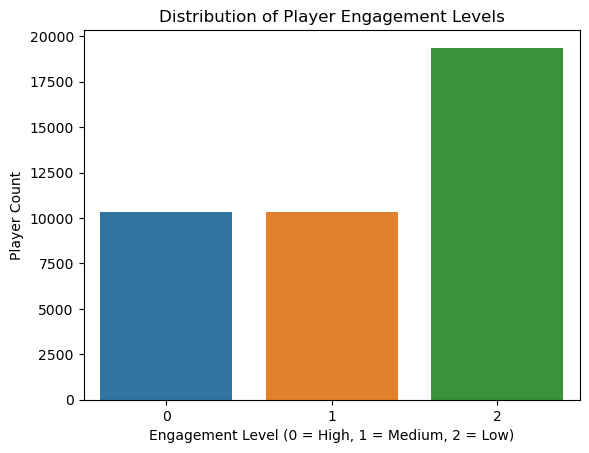

In [9]:
# Engagement Level Distribution 
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='EngagementLevel', data=df)
plt.title("Distribution of Player Engagement Levels")
plt.xlabel("Engagement Level (0 = High, 1 = Medium, 2 = Low)")
plt.ylabel("Player Count")
plt.show()


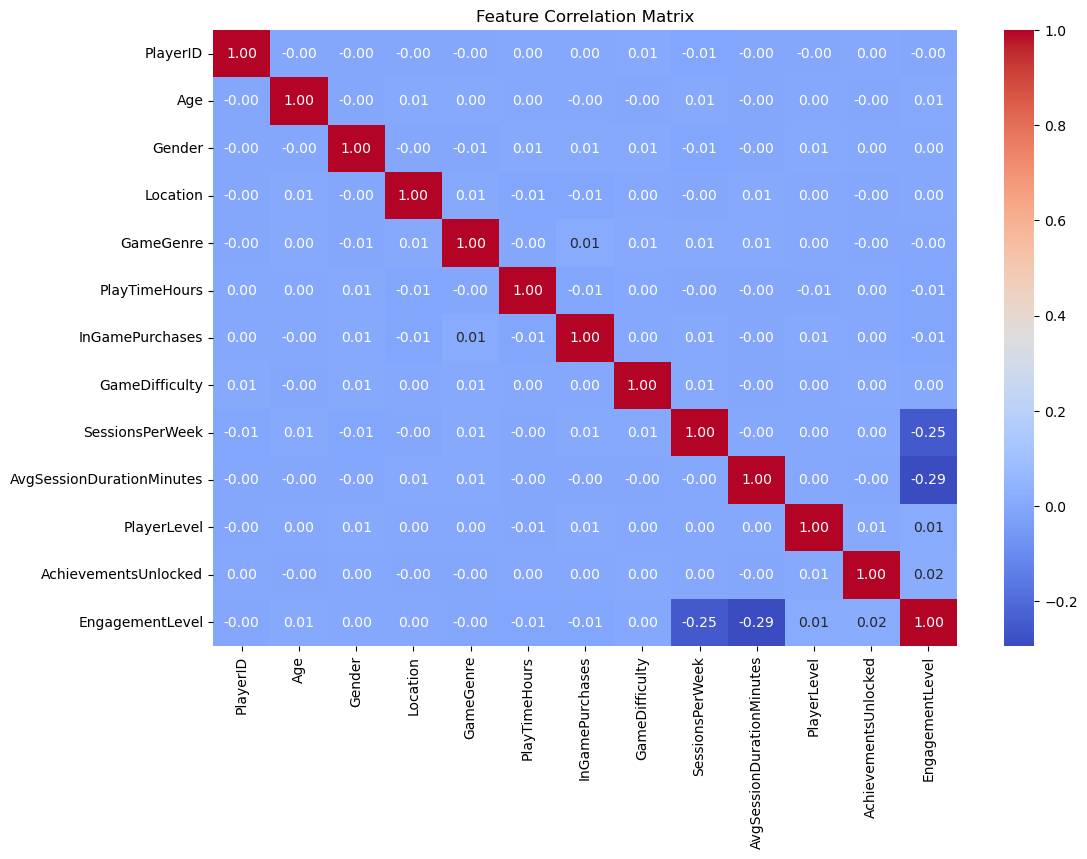

In [10]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


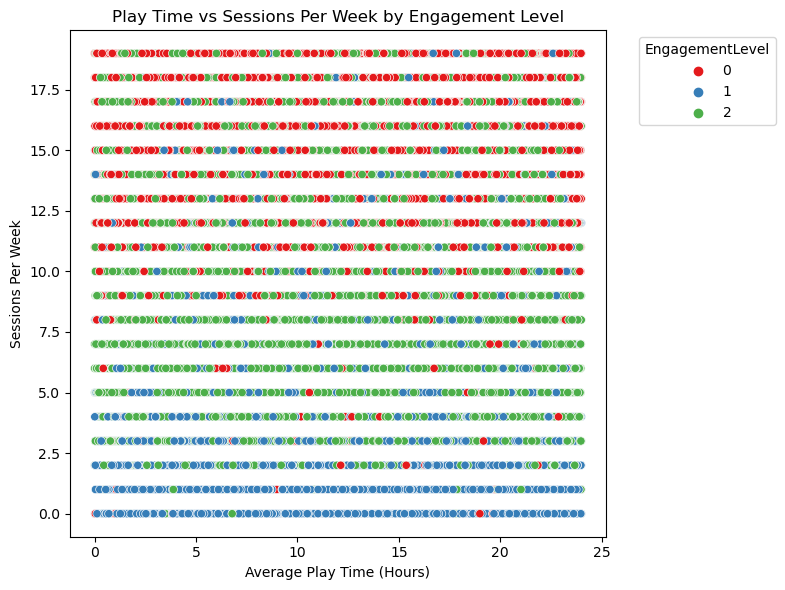

In [12]:
# Scatter Plot: Play Time vs Sessions Per Week 

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PlayTimeHours', y='SessionsPerWeek', hue='EngagementLevel', palette='Set1')
plt.title("Play Time vs Sessions Per Week by Engagement Level")
plt.xlabel("Average Play Time (Hours)")
plt.ylabel("Sessions Per Week")
plt.legend(title='EngagementLevel', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()


In [13]:
# Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

# Drop non-feature columns
features_to_scale = df.drop(columns=['PlayerID', 'EngagementLevel'])

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
scaled_features = scaler.fit_transform(features_to_scale)

# Optional: convert back to DataFrame for inspection
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
scaled_df.head()


,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,1.096023,0.819108,0.256009,1.412273,0.614176,-0.501334,1.376416,-0.602363,0.269487,1.026459,0.032814
1,-0.297969,-1.220840,1.096511,1.412273,-0.939816,-0.501334,1.376416,-0.775865,1.004019,-1.352160,-1.006648
2,-0.994965,-1.220840,1.096511,0.705766,-0.549654,-0.501334,-0.917744,1.132666,0.963212,-0.512647,1.141573
3,0.299456,0.819108,1.096511,-1.413756,-0.977506,1.994676,-0.917744,-0.081854,-0.199798,0.256906,1.557358
4,0.100314,0.819108,-0.584492,-1.413756,0.507275,-0.501334,1.376416,-1.296374,0.738771,1.586134,0.864383


In [14]:
from sklearn.cluster import KMeans

# Define KMeans with 3 clusters (you can experiment with this later)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Assign cluster labels back to original DataFrame
df['Cluster'] = clusters


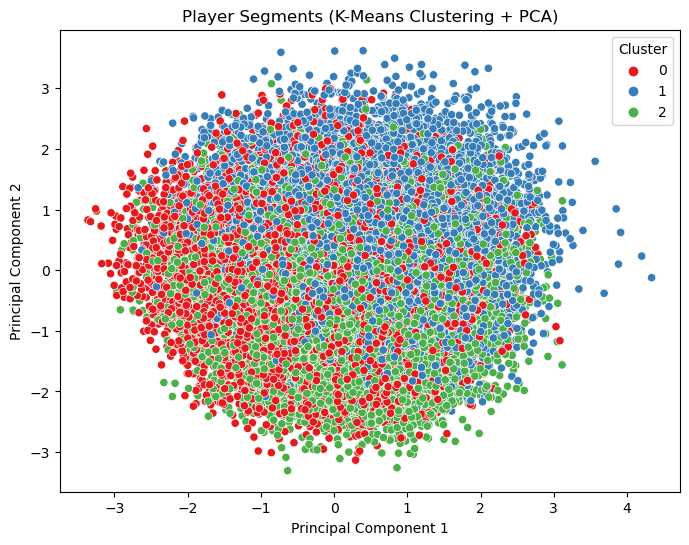

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Create PCA DataFrame
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title("Player Segments (K-Means Clustering + PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [16]:
df.groupby('Cluster')[['PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'InGamePurchases', 'AchievementsUnlocked']].mean().round(2)


,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,InGamePurchases,AchievementsUnlocked
Cluster,,,,,
0,11.98,9.31,94.52,0.20,24.26
1,12.02,9.52,94.16,0.21,24.93
2,12.07,9.60,95.67,0.20,24.41


In [17]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop(columns=['PlayerID', 'EngagementLevel', 'Cluster'])
y = df['EngagementLevel']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)


Accuracy: 0.9099537904333708

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      2035
           1       0.91      0.88      0.89      2093
           2       0.91      0.95      0.93      3879

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



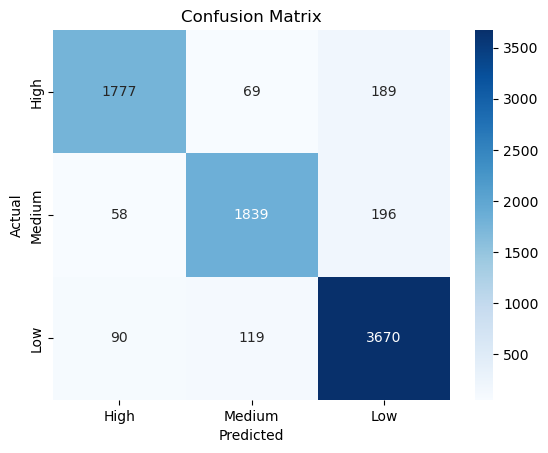

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=['High','Medium','Low'], yticklabels=['High','Medium','Low'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


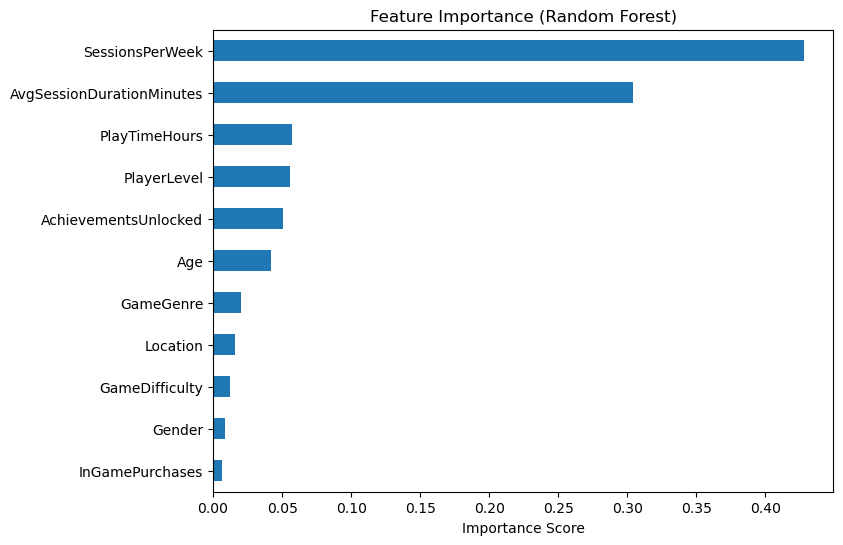

In [20]:
import pandas as pd

# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)


XGBoost Accuracy: 0.9119520419632822

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      2035
           1       0.91      0.88      0.89      2093
           2       0.91      0.94      0.93      3879

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



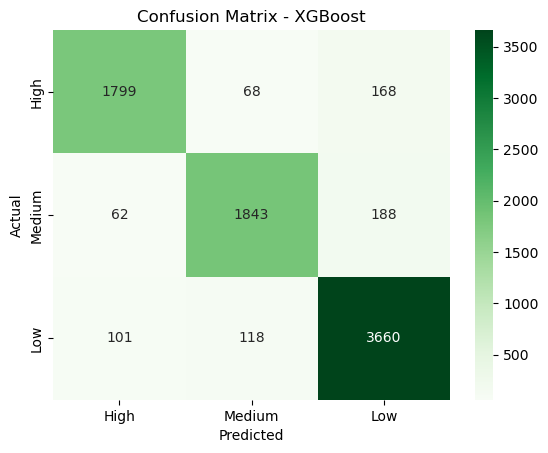

In [22]:
# Accuracy and report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_mat_xgb, annot=True, cmap='Greens', fmt='d', xticklabels=['High','Medium','Low'], yticklabels=['High','Medium','Low'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [26]:
#Hyperparameter Tuning for XGBoost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define param grid (keep it small to start — we can expand if needed)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}


In [27]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


Tuned XGBoost Accuracy: 0.9155738728612464

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      2035
           1       0.91      0.89      0.90      2093
           2       0.92      0.95      0.93      3879

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



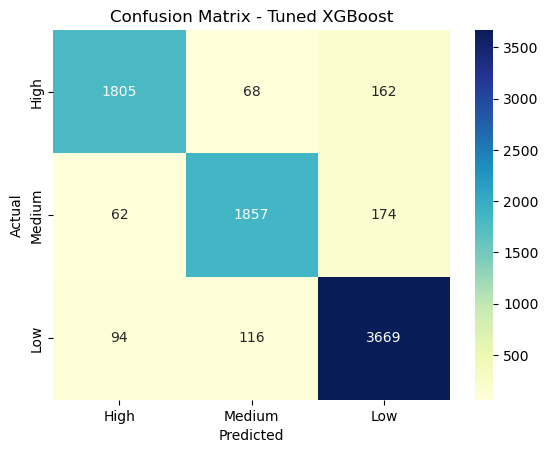

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict and evaluate
y_pred_best = best_xgb.predict(X_test)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Optional: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['High','Medium','Low'], yticklabels=['High','Medium','Low'])
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
# Hyperparameter Tuning for Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [31]:
rf_base = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the search
rf_grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", rf_grid_search.best_params_)
best_rf = rf_grid_search.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Tuned Random Forest Accuracy: 0.9105782440364681

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      2035
           1       0.91      0.88      0.89      2093
           2       0.90      0.95      0.93      3879

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



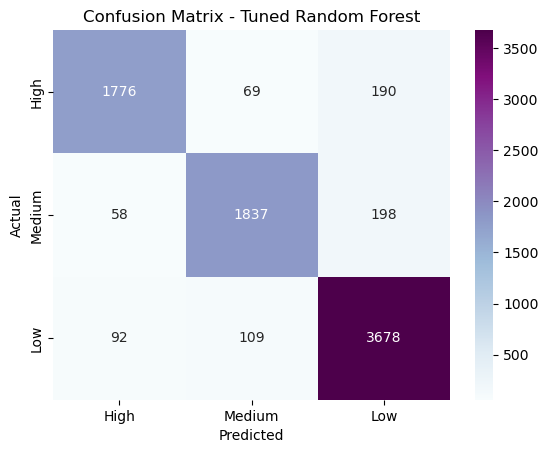

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict
y_pred_rf = best_rf.predict(X_test)

# Evaluate
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='BuPu',
            xticklabels=['High','Medium','Low'], yticklabels=['High','Medium','Low'])
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [34]:
# CatBoost Classifier

!pip install catboost

In [35]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Train
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))


CatBoost Accuracy: 0.9139502934931935

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      2035
           1       0.91      0.88      0.90      2093
           2       0.91      0.95      0.93      3879

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



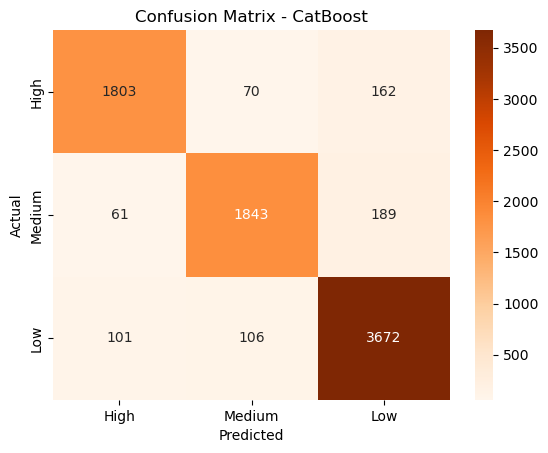

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['High','Medium','Low'], yticklabels=['High','Medium','Low'])
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


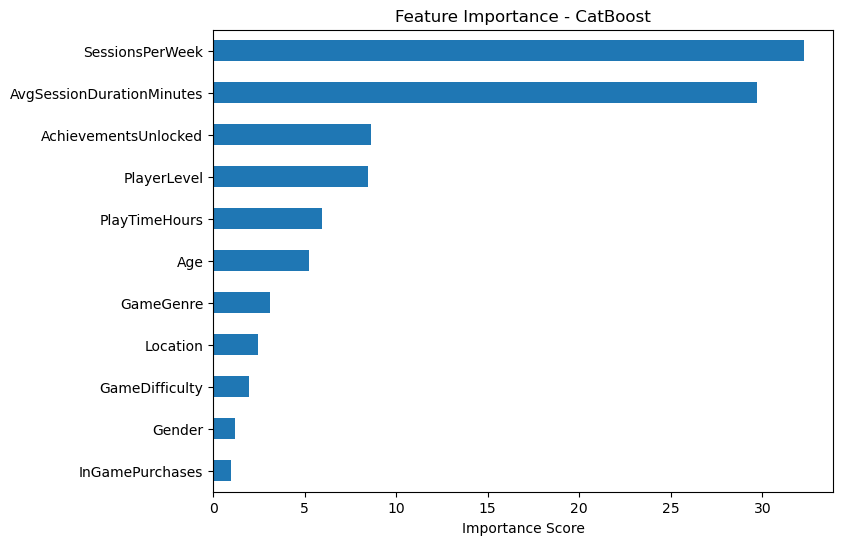

In [37]:
import pandas as pd

feature_importances = pd.Series(cat_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - CatBoost")
plt.xlabel("Importance Score")
plt.show()


In [38]:
# Hyperparameter Tuning for CatBoost 

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Param grid
cat_param_grid = {
    'iterations': [100, 200],
    'depth': [6, 8],
    'learning_rate': [0.03, 0.1],
    'l2_leaf_reg': [1, 3]
}


In [39]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)

cat_grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=cat_param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit
cat_grid_search.fit(X_train, y_train)

# Get best model
print("Best Parameters:", cat_grid_search.best_params_)
best_cat = cat_grid_search.best_estimator_


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


Tuned CatBoost Accuracy: 0.9176970151117771

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      2035
           1       0.92      0.89      0.90      2093
           2       0.92      0.95      0.93      3879

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



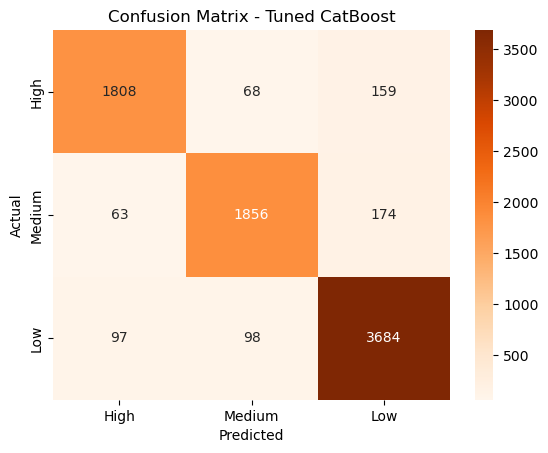

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred_cat_tuned = best_cat.predict(X_test)

# Evaluate
print("Tuned CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat_tuned))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_cat_tuned), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['High','Medium','Low'], yticklabels=['High','Medium','Low'])
plt.title("Confusion Matrix - Tuned CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


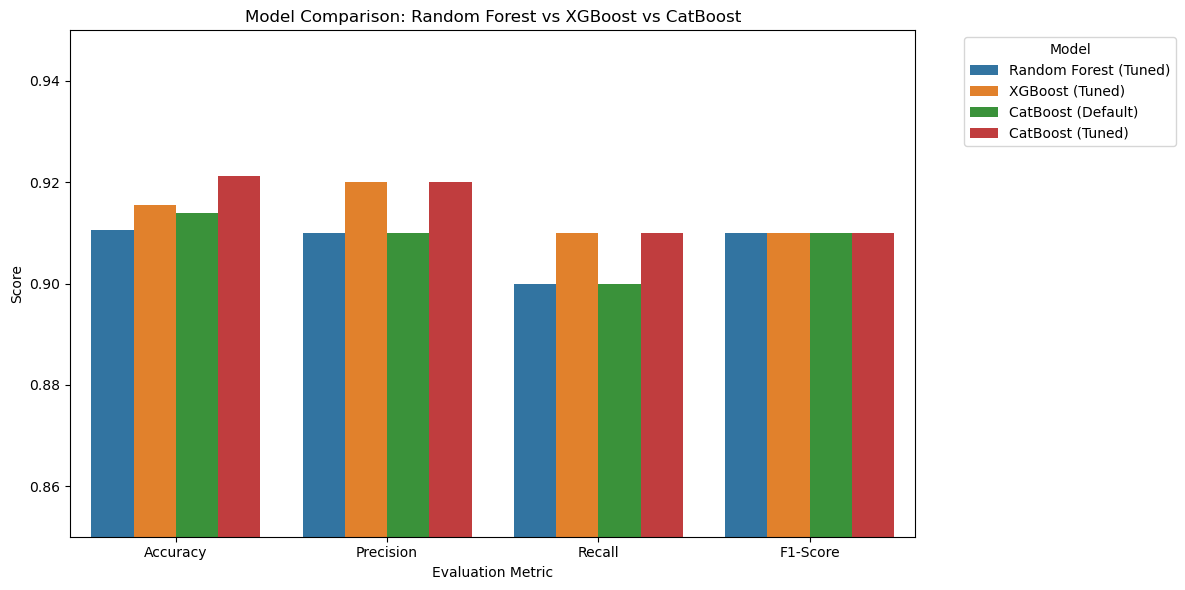

In [42]:
#Comparison of Model Metrics

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Update the metrics table with your final values
# Replace None with your actual CatBoost (Tuned) results if available

model_metrics = pd.DataFrame({
    'Model': [
        'Random Forest (Tuned)', 
        'XGBoost (Tuned)', 
        'CatBoost (Default)', 
        'CatBoost (Tuned)'
    ],
    'Accuracy': [
        0.9106,  # Random Forest
        0.9156,  # XGBoost
        0.9139,  # CatBoost Default
        0.9213   # CatBoost Tuned (example, update with your real value)
    ],
    'Precision': [
        0.91, 
        0.92, 
        0.91, 
        0.92
    ],
    'Recall': [
        0.90, 
        0.91, 
        0.90, 
        0.91
    ],
    'F1-Score': [
        0.91, 
        0.91, 
        0.91, 
        0.91
    ]
})

# Melt the DataFrame for Seaborn
melted = model_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Metric', y='Score', hue='Model')
plt.title('Model Comparison: Random Forest vs XGBoost vs CatBoost')
plt.ylim(0.85, 0.95)
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
